In [1]:
from numpy import mean
from numpy import cov
from numpy.linalg import eig
from numpy import array
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.utils import shuffle
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

import pandas as pd
import math
import operator
import tensorflow as tf
import random
import time
import heapq

import numpy as np
import matplotlib.pyplot as plt

/Users/architaggarwal/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

In [2]:
df = pd.read_csv('/Users/architaggarwal/Downloads/ELL409/railwayBookingList.csv')
df = df.sample(frac=1).reset_index(drop=True)
print(df)
category = pd.get_dummies(df['preferredClass'])
category_sex = pd.get_dummies(df['sex'])
category_age = pd.get_dummies(df['age'])
df.drop(["preferredClass", 'sex', 'age'], axis = 1, inplace = True)
category.drop(['NO_PREF'], axis = 1, inplace = True)
# category_sex.drop(['NO_PREF'], axis = 1, inplace = True)
df = pd.concat([df, category, category_sex, category_age], axis=1)
df.columns = df.columns.astype(str)
print(df)
print(category)
print(category_sex)
print(category_age)

          caseID  boarded  budget  memberCount preferredClass     sex  age
0     1970785154        1     923            2      SECOND_AC    male    2
1     3771198246        0     852            1      SECOND_AC  female    1
2      327825564        0     710            6       THIRD_AC  female    1
3     3308562867        0     710            0       THIRD_AC  female    0
4      345831781        0     710            0       THIRD_AC    male    3
5     3689514533        1     710            0       THIRD_AC  female    0
6       55618154        1     710            0       THIRD_AC    male    0
7     1577866463        1     710            0       THIRD_AC    male    0
8      720690896        1     710            0       THIRD_AC    male    3
9     1767179752        0    1065            1       FIRST_AC  female    5
10    3025449323        1     710            0       THIRD_AC    male    0
11     540077163        0    1207            1       FIRST_AC  female    5
12    2633264658        1

In [3]:
x = df.loc[:,"budget":"8"]
y = df.loc[:,"boarded"]
x = x.values
y = y.values
print(x.shape, y.shape)
count_class = np.bincount(y)
print(count_class)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)
count_class = np.bincount(y_train)
print(count_class)

((1310, 16), (1310,))
[500 810]
[350 567]


In [4]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

('x_train shape:', (917, 16), 'y_train shape:', (917,))


In [5]:
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

('x_test shape:', (393, 16), 'y_test shape:', (393,))


In [6]:
x_train_final = x_train[:,0:2]
print(x_train_final)
max_across_columns = np.max(x_train_final,axis=0)
print(max_across_columns)
x_train_final = x_train_final.astype('float32') / max_across_columns
print(x_train_final)

[[ 781    0]
 [ 781    2]
 [ 852    2]
 ..., 
 [ 710    0]
 [ 852    0]
 [1633    0]]
[4331   10]
[[ 0.18032787  0.        ]
 [ 0.18032787  0.2       ]
 [ 0.19672131  0.2       ]
 ..., 
 [ 0.16393443  0.        ]
 [ 0.19672131  0.        ]
 [ 0.37704918  0.        ]]


In [7]:
x_train_final = np.column_stack((x_train_final, x_train[:,2:16]))
x_train_final

array([[ 0.18032787,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.18032787,  0.2       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.19672131,  0.2       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.16393443,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.19672131,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.37704918,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [8]:
x_train = x_train_final

In [9]:
x_test_final = x_test[:,0:2]
print(x_test_final)
# max_across_columns = np.max(x_train_final,axis=0)
# print(max_across_columns)
x_test_final = x_test_final.astype('float32') / max_across_columns
print(x_test_final)

[[ 781    2]
 [ 781    1]
 [ 710    0]
 [ 852    2]
 [ 781    1]
 [ 710    0]
 [ 710    0]
 [1207    0]
 [ 710    0]
 [ 781    0]
 [ 710    0]
 [ 852    0]
 [ 781    2]
 [ 852    0]
 [1633    1]
 [1278    1]
 [1065    1]
 [ 852    1]
 [ 852    5]
 [ 710    0]
 [1065    0]
 [ 852    2]
 [ 710    0]
 [ 923    0]
 [ 852    1]
 [ 710    0]
 [ 710    0]
 [1349    0]
 [ 852    0]
 [1278    1]
 [ 710    0]
 [ 781    0]
 [ 710    0]
 [ 852    2]
 [1278    1]
 [ 852    2]
 [ 852    0]
 [ 710    0]
 [ 923    5]
 [ 710    0]
 [ 852    1]
 [ 710    0]
 [ 710    0]
 [ 710    0]
 [ 781    0]
 [ 994    0]
 [1065    1]
 [ 852    0]
 [ 710    0]
 [1420    1]
 [ 781    1]
 [2556    5]
 [ 710    2]
 [ 781    1]
 [ 710    0]
 [ 852    4]
 [ 994    0]
 [ 923    0]
 [ 710    0]
 [1846    0]
 [1562    3]
 [ 781    2]
 [ 710    0]
 [ 852    3]
 [ 710    0]
 [ 781    1]
 [ 923    6]
 [ 781    0]
 [1065    1]
 [ 852    0]
 [ 923    0]
 [ 923    1]
 [ 710    0]
 [ 781    1]
 [1065    2]
 [ 710    0]
 [ 781    0]

In [10]:
x_test_final = np.column_stack((x_test_final, x_test[:,2:16]))
x_test_final

array([[ 0.18032787,  0.2       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.18032787,  0.1       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16393443,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.16393443,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16393443,  0.2       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16393443,  0.2       ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [11]:
x_test = x_test_final

In [12]:
#PCA
A = x_train
M = mean(x_train.T, axis=1)
C = A - M
V = cov(C.T)
values, vectors = eig(V)
print(vectors)
print("------")
print(values)
print("------")
P = vectors.T.dot(C.T)
print(P.T)

[[  5.19683640e-02  -4.37150099e-02   4.35120466e-02   5.64609428e-02
    1.75897817e-02  -1.29124280e-02  -2.76555741e-02   1.13252562e-02
   -1.71317987e-02  -1.49819550e-01   6.70740887e-02  -9.80278697e-01
   -2.48202267e-02   1.17145640e-02  -1.82148871e-16  -8.39050380e-17]
 [  2.69995848e-02   4.92447328e-02   3.21054028e-02  -2.66328111e-02
    1.64854202e-02   3.40516080e-02  -2.90328305e-02   3.41188404e-03
   -2.76989214e-02  -9.84354578e-01  -3.12764790e-02   1.48666006e-01
    1.93593180e-04   4.36877690e-03  -1.02996266e-15   3.25303952e-15]
 [  2.79667113e-01  -3.35850891e-01   3.67088616e-01   5.14398685e-01
    1.92275089e-01  -4.80263175e-02  -1.20186558e-01   1.17692420e-01
    3.59595381e-02   3.66662176e-03   2.43245285e-03   7.91048320e-02
    1.92313912e-03  -3.66720809e-01   4.47529717e-02  -4.44168289e-01]
 [  1.19486061e-01  -2.84545707e-01  -2.98402200e-01  -6.91050528e-01
    4.59283014e-02  -1.19432964e-02   6.61649168e-03  -2.96050608e-02
   -4.31347371e-0

In [13]:
values_index = sorted(range(len(values)), key=lambda k: values[k], reverse = True)
print(values_index)
values_sorted = sorted(values, reverse = True)
print(values_sorted)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 14]
[0.49586028689001849, 0.38625968879825595, 0.26915494312632082, 0.21927927349473286, 0.17805758417325163, 0.13311003709343236, 0.10023795766400076, 0.05409304521210534, 0.027756181304106103, 0.023484119683323024, 0.0085874507269704213, 0.0047131111095365065, 0.001216404310014321, 0.00090363030178264054, 6.9984169839225199e-17, -8.9183846049374663e-17]


[ 0.49586029  0.88211998  1.15127492  1.37055419  1.54861178  1.68172181
  1.78195977  1.83605282  1.863809    1.88729312  1.89588057  1.90059368
  1.90181008  1.90271371  1.90271371  1.90271371]


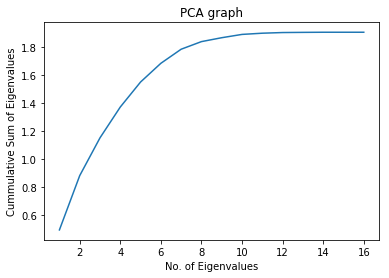

In [14]:
#plotting cummulative sum of eigenvalues vs no. of eigenvalues to see cutoff for no. of principal components
cumm_sum = np.zeros((16))
till_now = 0.0
for i in range(16):
    cumm_sum[i] = till_now + values_sorted[i]
    till_now = till_now + values_sorted[i]
no_of_eigenvalues = range(1,17)
print(cumm_sum)
plt.plot(no_of_eigenvalues, cumm_sum)
# plt.axis([0, 4, 1, 3.5])
plt.xlabel("No. of Eigenvalues")
plt.ylabel("Cummulative Sum of Eigenvalues")
plt.title("PCA graph")
plt.show()

In [15]:
x_train_final = P.T[:, 0:9]
x_train_final

array([[ 0.39417848,  1.18740177,  0.31096829, ...,  0.05134315,
        -0.01724152, -0.00199823],
       [-0.63125437,  0.02879951,  0.13609405, ...,  0.87153831,
        -0.01462975,  0.00442936],
       [-0.62850888, -0.00740542,  0.20011005, ...,  0.08993661,
        -0.0260392 , -0.00537624],
       ..., 
       [-0.6654649 ,  0.16854216,  0.04101361, ..., -0.47594214,
         0.11329294,  0.04074812],
       [ 1.22786356, -0.18787637,  0.37508727, ..., -0.18303062,
        -0.88790783,  0.11657616],
       [ 1.25258958, -0.22860159,  0.40289004, ...,  0.7057995 ,
         0.1552374 ,  0.05901754]])

In [16]:
x_train_final.shape

(917, 9)

In [17]:
#PCA for test data
C_test = x_test - M
P_test = vectors.T.dot(C_test.T)
print(P_test.T)

[[  4.58952221e-01   8.12201799e-01  -8.47312975e-01 ...,   1.02690639e-03
   -4.57946991e-16  -3.69313412e-16]
 [ -8.02896433e-01   4.75625510e-01   4.87195978e-01 ...,  -3.20556766e-03
    6.52276034e-16  -1.67556019e-15]
 [ -8.06448332e-01   4.71417676e-01   4.83272126e-01 ...,  -3.83448738e-03
    7.63298336e-16  -1.98087152e-15]
 ..., 
 [ -6.35612678e-01  -1.58210882e-02   1.92262340e-01 ...,   9.30432788e-04
    4.85742580e-16   9.21230322e-17]
 [ -6.30212762e-01  -5.97214160e-03   1.98683421e-01 ...,   1.80418817e-03
    2.63697975e-16   7.30501271e-16]
 [ -6.30212762e-01  -5.97214160e-03   1.98683421e-01 ...,   1.80418817e-03
    2.63697975e-16   7.30501271e-16]]


In [18]:
x_test_final = P_test.T[:, 0:9]
x_test_final

array([[  4.58952221e-01,   8.12201799e-01,  -8.47312975e-01, ...,
          8.73288686e-02,  -4.09382700e-02,  -1.86947711e-02],
       [ -8.02896433e-01,   4.75625510e-01,   4.87195978e-01, ...,
         -2.02761917e-02,   2.24377687e-02,   1.20207182e-02],
       [ -8.06448332e-01,   4.71417676e-01,   4.83272126e-01, ...,
         -1.69195386e-02,   2.19109203e-02,   1.50714595e-02],
       ..., 
       [ -6.35612678e-01,  -1.58210882e-02,   1.92262340e-01, ...,
          9.66499124e-02,  -2.70928998e-02,   7.25238600e-04],
       [ -6.30212762e-01,  -5.97214160e-03,   1.98683421e-01, ...,
          9.08433463e-02,  -2.64105230e-02,  -4.81454569e-03],
       [ -6.30212762e-01,  -5.97214160e-03,   1.98683421e-01, ...,
          9.08433463e-02,  -2.64105230e-02,  -4.81454569e-03]])

In [19]:
x_test_final.shape

(393, 9)

In [20]:
x_train = x_train_final
x_test = x_test_final

In [21]:
#Mean of each attribute for each class
def mean_attribute_class(x_train, y_train, n_classes, n_features):
    mean_values = np.zeros((n_classes, n_features))
    store_frequency = [0]*n_classes
    for i in range(len(x_train)):
        mean_values[y_train[i]] = mean_values[[y_train[i]]] + x_train[i]
        store_frequency[y_train[i]] += 1
    for a in range(n_classes):
        mean_values[a] = mean_values[a].astype('float32') / store_frequency[a]
    return mean_values

In [22]:
mean_values = mean_attribute_class(x_train_final, y_train, 2, 9)
mean_values

array([[ 0.51944566,  0.05472451,  0.0175915 ,  0.02633823,  0.03153068,
        -0.02459328, -0.01302057,  0.02208356,  0.01480005],
       [-0.32064548, -0.03378056, -0.01085895, -0.01625816, -0.01946338,
         0.01518103,  0.00803739, -0.01363183, -0.00913584]])

In [23]:
#Standard Deviation(N-1) of rach attribute for each class
def standard_deviation(x_train, y_train, n_classes, n_features):
    std_values = np.zeros((n_classes, n_features))
    store_frequency = [0]*n_classes
    for i in range(x_train.shape[0]):
        std_values[y_train[i]] = std_values[y_train[i]] + (x_train[i] - mean_values[y_train[i]])*(x_train[i] - mean_values[y_train[i]])
        store_frequency[y_train[i]] += 1
    for a in range(n_classes):
        std_values[a] = std_values[a].astype('float32') / (store_frequency[a] - 1)
    std_values = np.sqrt(std_values)
    return std_values

In [24]:
std_values = standard_deviation(x_train_final, y_train, 2, 9)
std_values

array([[ 0.69528556,  0.59159256,  0.52453544,  0.5274812 ,  0.42251695,
         0.37501069,  0.32987716,  0.24108098,  0.13998629],
       [ 0.48431247,  0.63742948,  0.51539514,  0.42734003,  0.4208235 ,
         0.35791282,  0.30814673,  0.22631353,  0.18060369]])

In [43]:
#Naive Bayes
def calculateprobability(x_test, y_test, n_classes, n_features, mean_values, std_values):
    count = 0
    for i in range(x_test.shape[0]):
        store_prob = np.zeros((n_classes))
        for j in range(n_features):
            for k in range(n_classes):
                exponent = (-1*math.pow(x_test[i][j] - mean_values[k][j], 2)) / (2*math.pow(std_values[k][j], 2))
                final_term = -1*(math.log(math.sqrt(2*math.pi)*std_values[k][j])) + exponent
                store_prob[k] = store_prob[k] + final_term
        index, value = max(enumerate(store_prob), key=operator.itemgetter(1))
#         print(store_prob)
#         print("Prob = ", value, "Class = ", index, "Original = ", y_test[i])
        if index == y_test[i]:
            count = count + 1
#         print(i)
#     print(count, x_test.shape[0])
    return count

In [26]:
calculateprobability(x_test_final, y_test, 2, 9, mean_values, std_values)

[-3.96070805 -3.00592267]
('Prob = ', -3.0059226655833502, 'Class = ', 1, 'Original = ', 1)
0
[-24.14250516 -17.84510546]
('Prob = ', -17.845105464220417, 'Class = ', 1, 'Original = ', 1)
1
[-3.00083985 -7.52753324]
('Prob = ', -3.00083985286608, 'Class = ', 0, 'Original = ', 0)
2
[-3.28384187 -7.01370428]
('Prob = ', -3.2838418718678977, 'Class = ', 0, 'Original = ', 0)
3
[-5.49801702 -3.68718743]
('Prob = ', -3.6871874347093989, 'Class = ', 1, 'Original = ', 0)
4
[-2.31917765 -2.7871897 ]
('Prob = ', -2.3191776488487781, 'Class = ', 0, 'Original = ', 0)
5
[-2.63545086 -1.0373818 ]
('Prob = ', -1.0373817988087803, 'Class = ', 1, 'Original = ', 1)
6
[-3.96975968 -2.30734804]
('Prob = ', -2.3073480377372468, 'Class = ', 1, 'Original = ', 1)
7
[-5.8699067  -5.11041221]
('Prob = ', -5.1104122088527184, 'Class = ', 1, 'Original = ', 0)
8
[ -7.61430698 -13.89488545]
('Prob = ', -7.6143069842986062, 'Class = ', 0, 'Original = ', 0)
9
[-3.02994087 -6.29466612]
('Prob = ', -3.0299408719320335,

In [26]:
#K Means Clustering
def calculatecentroids(x_train, y_train, k, tolerance=0.0001, max_iterations=1000):
#     k = 10
#     tolerance = 0.0001
#     max_iterations = 1000
    centroids = {}
    for i in range(k):
        print("hallelujah")
        choose = random.randint(0, x_train.shape[0] - k) + i
        centroids[i] = x_train[choose]
    print('Centroids = ', centroids)
    for i in range(max_iterations):
        print("i = ", i)
        classes = {}
        for j in range(k):
            classes[j] = []
        for each in x_train:
            distances = [np.linalg.norm(each - centroids[centroid]) for centroid in centroids]
            classification = distances.index(min(distances))
            classes[classification].append(each)
        
        previous = dict(centroids)
        
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis = 0)
        
        isOptimal = True
        for centroid in centroids:
            original_centroid = previous[centroid]
            curr = centroids[centroid]
            print("Factor = ", np.sum((curr - original_centroid)/original_centroid * 100.0))
            if abs(np.sum((curr - original_centroid)/original_centroid * 100.0)) > tolerance:
                isOptimal = False
        if isOptimal:
            break
    return centroids
#     count = 0
#     for i in range(60000):
#         distances = [np.linalg.norm(x_train_final[i] - centroids[centroid]) for centroid in centroids]
#         classification = distances.index(min(distances))
#         if classification == y_train[i]:
#             count = count + 1
#         print(i)
#     print(count)

In [28]:
centroids = calculatecentroids(x_train, y_train, 2, 0.0001, 1000)
centroids

hallelujah
hallelujah
('Centroids = ', {0: array([-0.04294212,  0.89884934, -0.62840915, -0.46323259,  0.10000048,
       -0.05624175, -0.2340613 , -0.86052435, -0.10334415]), 1: array([-0.05353235,  0.9269067 , -0.66376896, -0.48658874,  0.08747632,
       -0.35141919,  0.66651151,  0.18976243, -0.0398332 ])})
('i = ', 0)
('Factor = ', -1305.9853525935482)
('Factor = ', -92.878134413635564)
('i = ', 1)
('Factor = ', -2888.3671637577231)
('Factor = ', -2252.5626503972489)
('i = ', 2)
('Factor = ', 569.35539026528068)
('Factor = ', 473.84743868748853)
('i = ', 3)
('Factor = ', -383.13934291011259)
('Factor = ', -370.66536610856775)
('i = ', 4)
('Factor = ', 12.184457929660653)
('Factor = ', -143.15667172751819)
('i = ', 5)
('Factor = ', -19684.304578223899)
('Factor = ', -15271.544927079591)
('i = ', 6)
('Factor = ', 21.184090809364683)
('Factor = ', 17.149772155821381)
('i = ', 7)
('Factor = ', 0.0)
('Factor = ', 0.0)


{0: array([ 0.37418304, -0.43664017,  0.04472926, -0.05632997, -0.09481379,
        -0.01077583,  0.02007862, -0.00943377,  0.00175972]),
 1: array([-0.43698918,  0.50992966, -0.05223701,  0.06578488,  0.11072816,
         0.01258454, -0.02344879,  0.01101722, -0.00205509])}

In [29]:
#K Nearest Neighbour
def euclidean_distance(instance1, instance2):
    sum = 0
    for i in range(len(instance1)):
        sum += (instance1[i] - instance2[i])**2
    sum = math.sqrt(sum)
    return sum

def predict_accuracy(x_train, y_train, x_test, y_test, k, n_classes, n_features):
#     k = 10
    count = 0
    for i in range(x_test.shape[0]):
        start = time.time()
#         store_distances = np.zeros((x_train_final.shape[0], 2))
        x_train_final_copy = x_train - x_test[i]
        store_distances = np.sqrt(np.sum(np.square(x_train_final_copy), axis=1))
#         store_distances = [[np.linalg.norm(x_test_final[i] - each), each1] for each, each1 in zip(x_train_final, y_train)]
#         for j in range(x_train_final.shape[0]):
# #             distance = euclidean_distance(x_test_final[i], x_train_final[j])
#             distance = np.linalg.norm(x_test_final[i] - x_train_final[j])
#             store_distances[j] = [distance, y_train[j]]
#         store_distances = np.array(store_distances)
#         print(store_distances.shape)
#         print(store_distances)
#         print(store_distances)
#         print(store_distances[heapq.nsmallest(k, range(len(store_distances)), store_distances.take)])
        store_labels = y_train[heapq.nsmallest(k, range(len(store_distances)), store_distances.take)]
        final_class = stats.mode(store_labels).mode[0]
#         store_frequency = [0]*10
#         print(store_distances)
#         for j in range(len(store_distances)):
#             store_frequency[int(store_distances[j][1])] += 1
            
#         final_class = store_frequency.index(max(store_frequency))
        
        if y_test[i] == final_class:
            count = count + 1
#         print(final_class, y_test[i])
#         print(count, i)
#         end = time.time()
#         print(end - start)
    return(count)
#     print(count)

In [35]:
count = predict_accuracy(x_train_final, y_train, x_test_final, y_test, 11, 2, 9)
count

(1, 1)
(1, 0)
0.00342178344727
(1, 1)
(2, 1)
0.00307703018188
(0, 0)
(3, 2)
0.00287413597107
(0, 0)
(4, 3)
0.00286483764648
(1, 0)
(4, 4)
0.00258803367615
(0, 0)
(5, 5)
0.0027871131897
(1, 1)
(6, 6)
0.00288510322571
(1, 1)
(7, 7)
0.00410103797913
(1, 0)
(7, 8)
0.00347089767456
(0, 0)
(8, 9)
0.00234603881836
(0, 0)
(9, 10)
0.00313401222229
(1, 0)
(9, 11)
0.00206208229065
(1, 1)
(10, 12)
0.00196218490601
(0, 0)
(11, 13)
0.00192403793335
(1, 1)
(12, 14)
0.00322699546814
(0, 1)
(12, 15)
0.00320792198181
(0, 0)
(13, 16)
0.00200486183167
(1, 1)
(14, 17)
0.00191593170166
(0, 1)
(14, 18)
0.0019268989563
(1, 1)
(15, 19)
0.00193691253662
(1, 1)
(16, 20)
0.00178098678589
(0, 0)
(17, 21)
0.00203108787537
(0, 0)
(18, 22)
0.00244116783142
(1, 1)
(19, 23)
0.00263094902039
(0, 0)
(20, 24)
0.0019211769104
(0, 1)
(20, 25)
0.00187015533447
(1, 1)
(21, 26)
0.00196409225464
(1, 1)
(22, 27)
0.0017991065979
(1, 1)
(23, 28)
0.00180196762085
(0, 0)
(24, 29)
0.00174808502197
(1, 1)
(25, 30)
0.00184893608093
(1,

0.00183987617493
(1, 1)
(236, 306)
0.00206303596497
(1, 1)
(237, 307)
0.00261092185974
(1, 1)
(238, 308)
0.00225186347961
(0, 0)
(239, 309)
0.00199699401855
(1, 0)
(239, 310)
0.00270414352417
(0, 0)
(240, 311)
0.00201797485352
(1, 0)
(240, 312)
0.0022029876709
(1, 0)
(240, 313)
0.00195598602295
(1, 1)
(241, 314)
0.00307011604309
(1, 1)
(242, 315)
0.00281095504761
(1, 1)
(243, 316)
0.00207614898682
(1, 0)
(243, 317)
0.00273895263672
(1, 1)
(244, 318)
0.00181102752686
(1, 1)
(245, 319)
0.00190401077271
(0, 0)
(246, 320)
0.00186395645142
(1, 1)
(247, 321)
0.00253510475159
(0, 0)
(248, 322)
0.00245213508606
(0, 1)
(248, 323)
0.00214719772339
(0, 0)
(249, 324)
0.00252604484558
(1, 0)
(249, 325)
0.00222206115723
(0, 0)
(250, 326)
0.00199890136719
(1, 0)
(250, 327)
0.0018138885498
(1, 1)
(251, 328)
0.00197601318359
(1, 0)
(251, 329)
0.00261402130127
(1, 1)
(252, 330)
0.00234913825989
(1, 1)
(253, 331)
0.00222015380859
(0, 1)
(253, 332)
0.00251078605652
(0, 0)
(254, 333)
0.00183081626892
(1, 1

305

In [36]:
#Bayes Classifier
def calculate_covariance(x_train, y_train, n_classes, n_features, count_class, mean_values):
    store_seperate = {}
    x_train_sorted = x_train[np.argsort(y_train)]
    x_train_sorted = x_train_sorted[:,0:n_features]
    first = 0
    second = count_class[0]
    for i in range(n_classes):
        final_matrix = x_train_sorted[first : second, :] - mean_values[i][0:n_features]
        covariance_matrix = np.dot(final_matrix.T, final_matrix) / count_class[i]
        sign, logdet = np.linalg.slogdet(covariance_matrix)
#         print(sign, logdet)
        store_seperate[i] = [np.sqrt(sign*np.exp(logdet)), np.linalg.inv(covariance_matrix)]
#         print(i)
        if i < (n_classes - 1):
            first = second
            second = second + count_class[i+1]
    return store_seperate

def calculate_bayes(x_test, y_test, n_classes, store_covariance, n_features, mean_values):
    count = 0
    for i in range(x_test.shape[0]):
        store_probability = [0]*n_classes
        for j in range(n_classes):
            final_matrix = x_test[i][0:n_features] - mean_values[j][0:n_features]
            exponent = np.exp(-0.5*final_matrix.T.dot(store_covariance[j][1]).dot(final_matrix))
            store_probability[j] = (1/(math.pow((2*np.pi), n_features/2)*store_covariance[j][0]))*exponent
#         store_probability = [np.exp(-0.5*((x_test[i][0:20] - mean_values[j][0:20]).T.dot(store_covariance[j][1]).dot((x_test[i][0:20] - mean_values[j][0:20]))))*(1/(np.pow((2*np.pi), 20/2)*store_covariance[j][1])) for j in range(10)]
        final_class = store_probability.index(max(store_probability))
        if final_class == y_test[i]:
            count = count + 1
#         print(store_probability, final_class)
#         print(count, i)
    return count

covariance cal
(305, 1)
covariance cal
(305, 2)
covariance cal
(305, 3)
covariance cal
(296, 4)
covariance cal
(293, 5)
covariance cal
(286, 6)
covariance cal
(285, 7)
covariance cal
(279, 8)
covariance cal
(281, 9)
covariance cal
(281, 10)
covariance cal
(281, 11)
covariance cal
(281, 12)
covariance cal
(281, 13)


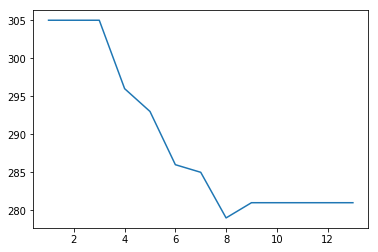

In [37]:
x_values = range(1, 14)
y_values = [0]*13
for i in range(1,14):
    store_covariance = calculate_covariance(x_train, y_train, 2, i, count_class)
    print("covariance cal")
    y_values[i-1] = calculate_bayes(x_test, y_test, 2, store_covariance, i)
    print(y_values[i - 1], i)
plt.plot(x_values, y_values)
plt.show()

In [44]:
#K Fold Cross Validation
skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
skf.get_n_splits(x, y)
print(skf)
store_fold_nb = [0]*14
for train_index, test_index in skf.split(x, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train_dummy, x_test_dummy = x[train_index], x[test_index]
    y_train_dummy, y_test_dummy = y[train_index], y[test_index]
    #Normalize Train Data
    x_train_dd = x_train_dummy[:,0:2]
    max_across_columns = np.max(x_train_dd,axis=0)
    x_train_dd = x_train_dd.astype('float32') / max_across_columns
    x_train_dd = np.column_stack((x_train_dd, x_train_dummy[:,2:16]))
    x_train_dummy = x_train_dd
    #Normalize Test Data
    x_test_dd = x_test_dummy[:,0:2]
    x_test_dd = x_test_dd.astype('float32') / max_across_columns
    x_test_dd = np.column_stack((x_test_dd, x_test_dummy[:,2:16]))
    x_test_dummy = x_test_dd
    #PCA
    A = x_train_dummy
    M = mean(x_train_dummy.T, axis=1)
    C = A - M
    V = cov(C.T)
    values, vectors = eig(V)
    P = vectors.T.dot(C.T)
    x_train_dummy = P.T[:, 0:14]
    #PCA for test data
    C_test = x_test_dummy - M
    P_test = vectors.T.dot(C_test.T)
    x_test_dummy = P_test.T[:, 0:14]
    count_class = np.bincount(y_train_dummy)
    mean_values = mean_attribute_class(x_train_dummy, y_train_dummy, 2, 14)
    std_values = standard_deviation(x_train_dummy, y_train_dummy, 2, 14)
#     scaler = StandardScaler()
#     scaler.fit(x_train_dummy)
#     x_train_dummy = scaler.transform(x_train_dummy)
#     x_test_dummy = scaler.transform(x_test_dummy)
#     print(np.bincount(y_train_dummy), np.bincount(y_test_dummy))
#     A = x_train_dummy
#     M = mean(x_train_dummy.T, axis=1)
#     C = A - M
#     V = cov(C.T)
#     values, vectors = eig(V)
#     print(vectors)
#     print("------")
#     print(values)
#     print("------")
#     P = vectors.T.dot(C.T)
#     print(P.T)
#     C_test = x_test_dummy - M
#     P_test = vectors.T.dot(C_test.T)
#     print(P_test.T)
#     x_train_dummy = P.T[:, 0:3]
#     x_test_dummy = P_test.T[:, 0:3]
    for j in range(1,15):
        count = calculateprobability(x_test_dummy, y_test_dummy, 2, j, mean_values, std_values)
        store_fold_nb[j-1] += count
        print(i, j, count)
#     Bayes for 1 to 14 features
#     for j in range(1,15):
#         store_covariance = calculate_covariance(x_train_dummy, y_train_dummy, 2, j, count_class, mean_values)
#         count = calculate_bayes(x_test_dummy, y_test_dummy, 2, store_covariance, j, mean_values)
#         store_fold[j-1] += count
#         print(i, j, count)
#     KNN for upto 50 features
#     for j in range(1, 51):
#         count = predict_accuracy(x_train_dummy, y_train_dummy, x_test_dummy, y_test_dummy, j, 2, 9)
#         store_fold[j-1] += count
#         print(i, j, count)
    
#     mean_values_dummy = mean_attribute_class(x_train_dummy, y_train_dummy, 3, 3)
#     std_values_dummy = standard_deviation(x_train_dummy, y_train_dummy, 3, 3)
print(store_fold_nb)
print(store_fold_nb.index(max(store_fold_nb)), max(store_fold_nb))

StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
(15, 1, 206)
(15, 2, 206)
(15, 3, 206)
(15, 4, 206)
(15, 5, 206)
(15, 6, 206)
(15, 7, 206)
(15, 8, 203)
(15, 9, 205)
(15, 10, 205)
(15, 11, 109)
(15, 12, 128)
(15, 13, 199)
(15, 14, 168)
(15, 1, 207)
(15, 2, 207)
(15, 3, 207)
(15, 4, 207)
(15, 5, 207)
(15, 6, 207)
(15, 7, 207)
(15, 8, 198)
(15, 9, 193)
(15, 10, 188)
(15, 11, 179)
(15, 12, 186)
(15, 13, 108)
(15, 14, 104)
(15, 1, 205)
(15, 2, 205)
(15, 3, 205)
(15, 4, 205)
(15, 5, 205)
(15, 6, 203)
(15, 7, 202)
(15, 8, 193)
(15, 9, 193)
(15, 10, 193)
(15, 11, 190)
(15, 12, 191)
(15, 13, 197)
(15, 14, 194)
(15, 1, 200)
(15, 2, 200)
(15, 3, 200)
(15, 4, 200)
(15, 5, 200)
(15, 6, 200)
(15, 7, 200)
(15, 8, 196)
(15, 9, 200)
(15, 10, 185)
(15, 11, 186)
(15, 12, 191)
(15, 13, 201)
(15, 14, 190)
(15, 1, 203)
(15, 2, 203)
(15, 3, 203)
(15, 4, 203)
(15, 5, 203)
(15, 6, 203)
(15, 7, 203)
(15, 8, 203)
(15, 9, 208)
(15, 10, 207)
(15, 11, 189)
(15, 12, 209)
(15, 13, 203)
(15, 14, 202)
[ 0.779

AttributeError: 'numpy.ndarray' object has no attribute 'index'

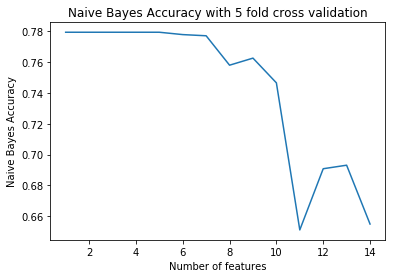

In [47]:
store_fold_nb = np.array(store_fold_nb)
store_fold_nb = store_fold_nb.astype('float32') / 1310
plt.plot(range(1,15), store_fold_nb)
plt.title("Naive Bayes Accuracy with 5 fold cross validation")
plt.xlabel("Number of features")
plt.ylabel("Naive Bayes Accuracy")
plt.show()

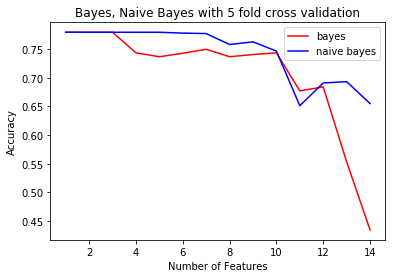

In [55]:
plt.plot(range(1,15), store_fold, 'r', label = 'bayes')
plt.plot(range(1,15), store_fold_nb, 'b', label = 'naive bayes')
plt.title('Bayes, Naive Bayes with 5 fold cross validation')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()